# Predicting the p-degree of aggregation for a new site

*Goal: We want to predict the H indicator values according to the aggregation rate (p) for a new geographical site.*  
The prediction is carried out considering only one chronicle and one approximation. The dataset contains the following data for each simulation configuration:
- the site number
- the H indicator values
- the execution time
- the number of lines in the input file
- the vulnerability rate
- etc

## Definition of variables

In [2]:
# Lib imports
import os

# Global variables
result_folder = "/run/media/jnsll/b0417344-c572-4bf5-ac10-c2021d205749/exps_modflops/results/"
dataset_filename = "Exps_H_Indicator_All_Sites.csv"

# Prediction variables
chronicle = 0
approx = 0
test_site = 1 # belongs to [1,...]
learn_size = 0.3

# Path to store the files created during the prediction process
MYDIR = result_folder + "ZLearning/" + "Approx"+ str(approx) + "/Chronicle" + str(chronicle) + "/SiteTest" + str(test_site)

# Checking if the path and directory where to store the prediction files exists, if not it is created
CHECK_FOLDER = os.path.isdir(MYDIR)
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("The directory did not exist. It has been created here: " + MYDIR)

## Importing and formatting the dataset for the prediction

In [3]:
#Lib imports
import pandas as pd

# Importing the dataset and storing it inside a dataframe
df = pd.read_csv(result_folder + dataset_filename)

# Only selecting the data corresponding to the chronicle and approximation chosen
df_chr = df[df["Chronicle"]==chronicle]
df_Chr_Approx = df_chr[df_chr["Approx"]==approx]

# Removing the dataframe columns which are not to be used for the prediction
del df_Chr_Approx["Approx"]
del df_Chr_Approx["Chronicle"]
del df_Chr_Approx["Execution Time"]
del df_Chr_Approx["Number of Lines"]

## Scatter plot of the variable to predict (H indicator value)

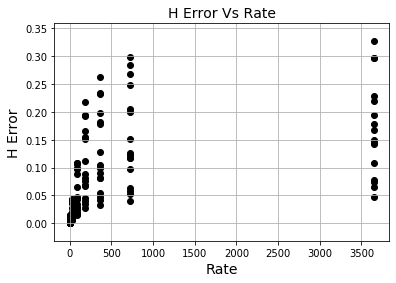

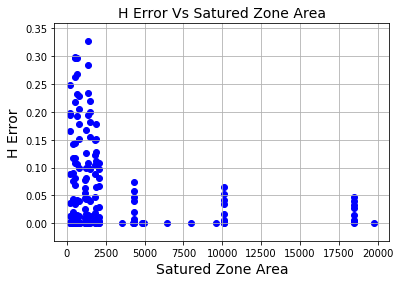

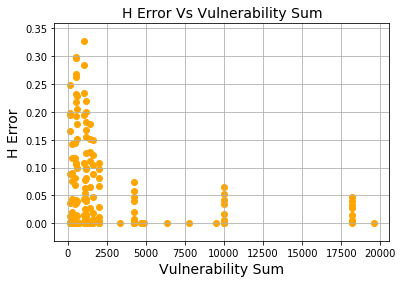

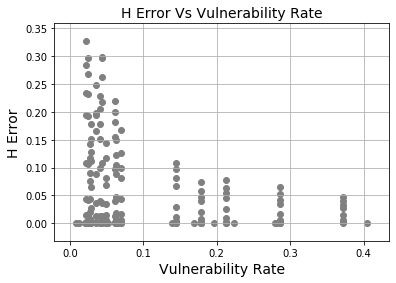

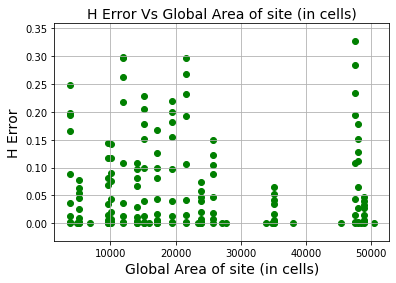

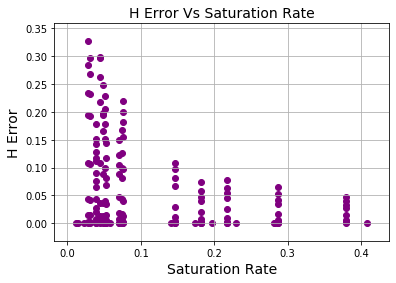

<Figure size 432x288 with 0 Axes>

In [4]:
#Lib imports
import matplotlib.pyplot as plt

# Variables for the scatter plot
## Names of the features corresponding to the names of the columns of the dataframe
features = ["Rate", "Satured Zone Area", "Vulnerability Sum", "Vulnerability Rate", "Global Area of site (in cells)", "Saturation Rate"]
## colors wanted to be used for the each plot for the corresponding feature
colors = ["black", "blue", "orange", "grey", "green", "purple"]

# Iterating over the feature
for nb_feature in range(len(features)):
    plt.scatter(df_Chr_Approx[features[nb_feature]], df_Chr_Approx['H Error'], color=colors[nb_feature])
    plt.title('H Error Vs ' + features[nb_feature], fontsize=14)
    plt.xlabel(features[nb_feature], fontsize=14)
    plt.ylabel('H Error', fontsize=14)
    plt.grid(True)
    

    plt.savefig(MYDIR + '/simple_scatter_plot_HError_' + features[nb_feature] + '.png') #, bbox_inches='tight'
    plt.show()
    plt.clf()

## Statistics from the learning dataset

In [5]:
#Lib imports
import numpy as np

# Variable to predict
y = df_Chr_Approx.filter(["Site_number", "H Error"], axis=1)
#y = pd.concat([df_Chr_Approx["Site_number"], df_Chr_Approx["H Error"]], axis=1)
# Features used to predict
X = df_Chr_Approx.drop('H Error', axis=1)
#new = old.filter(['A','B','D'], axis=1)
print("Learning Dataset has {} data points with {} variables each.".format(*df_Chr_Approx.shape))


# Minimum value of the data
minimum_H = np.amin(y["H Error"])
# Maximum value of the data
maximum_H = np.amax(y["H Error"])

# Mean value of the data
mean_H = np.mean(y["H Error"])

# Median value of the data
median_H = np.median(y["H Error"])

# Standard deviation of values of the data
std_H = np.std(y["H Error"])

# Show the calculated statistics
print("Statistics for dataset:\n")
print("Minimum H: {}".format(minimum_H)) 
print("Maximum H: {}".format(maximum_H))
print("Mean H: {}".format(mean_H))
print("Median H {}".format(median_H))
print("Standard deviation of H: {}".format(std_H))

Learning Dataset has 154 data points with 8 variables each.
Statistics for dataset:

Minimum H: 0.0
Maximum H: 0.327672624834692
Mean H: 0.06760010657513557
Median H 0.035547504479569
Standard deviation of H: 0.08225310202240842


## Pairplots of the features

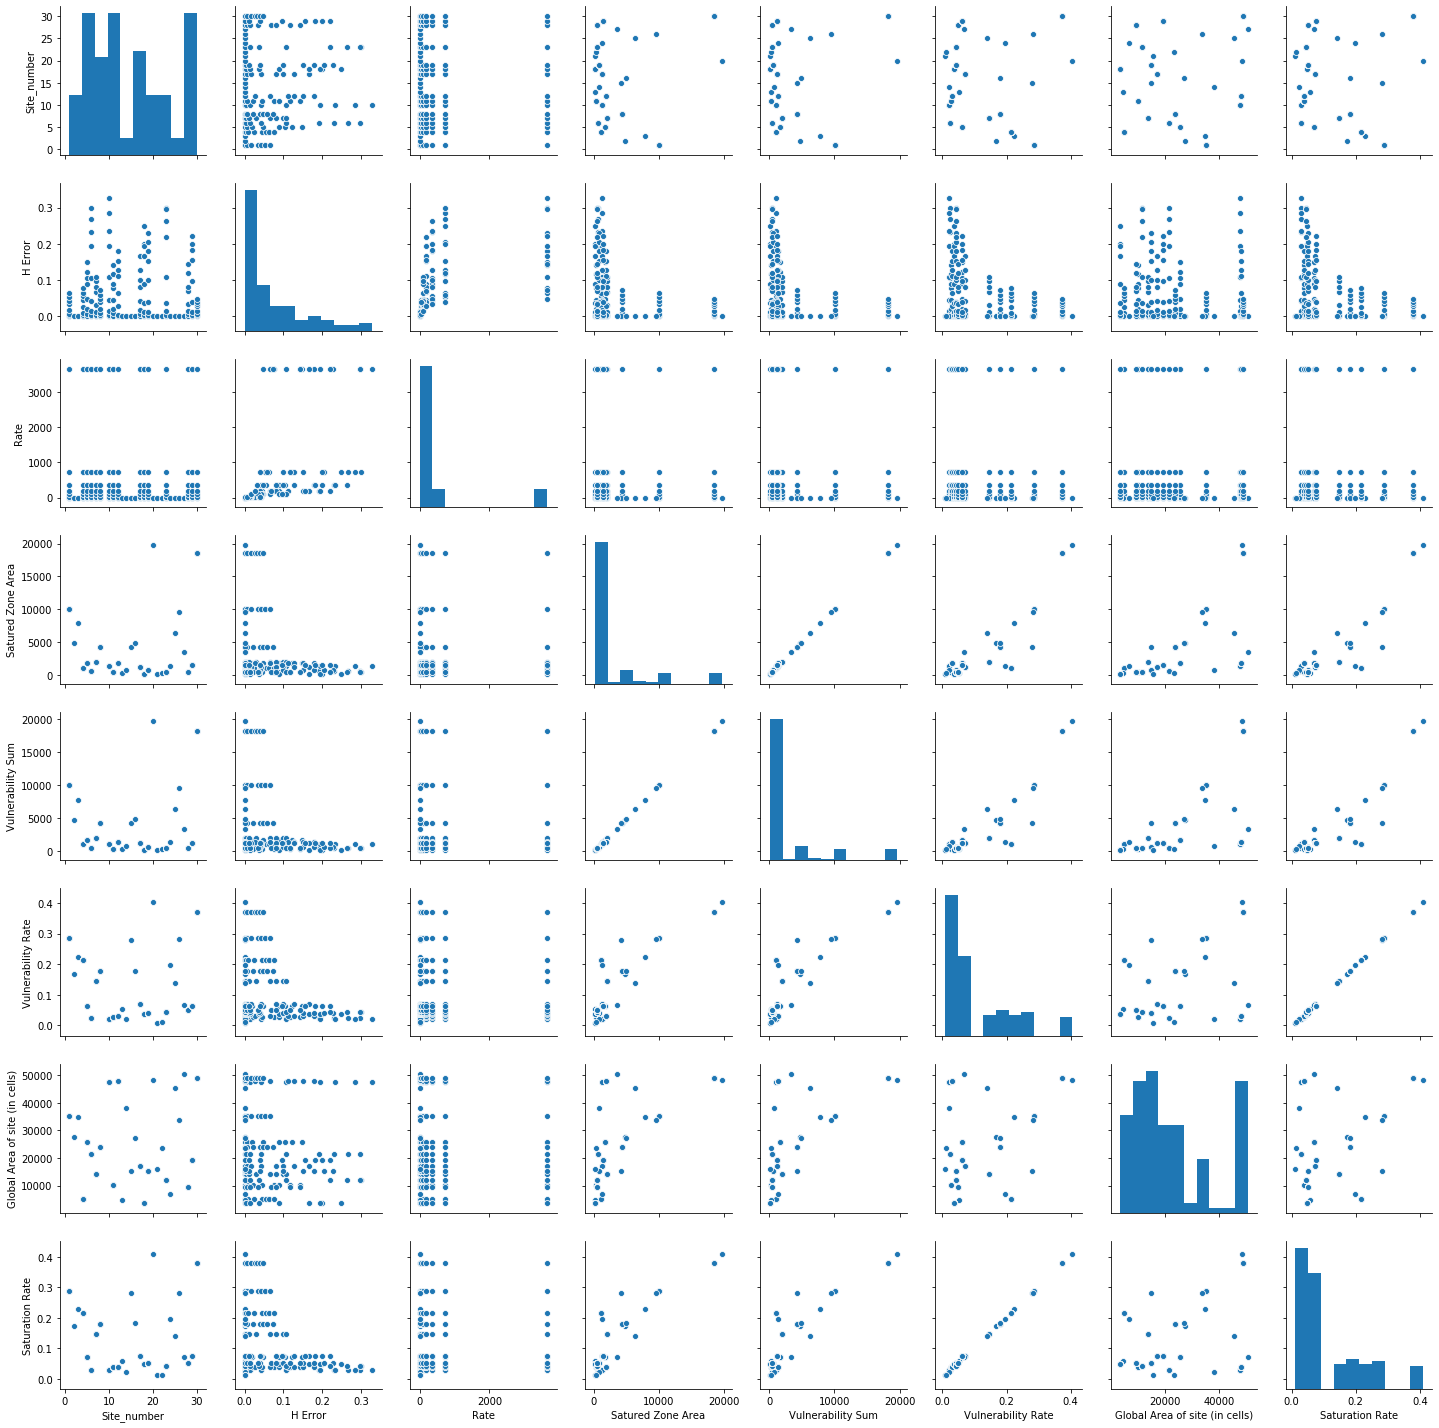

<Figure size 432x288 with 0 Axes>

In [6]:
# Lib imports
import seaborn as sns

sns.pairplot(df_Chr_Approx, height=2.5)
plt.savefig(MYDIR + '/Pairplots_HError' + '.png')
plt.show()
plt.clf()

## Correlation matrixes

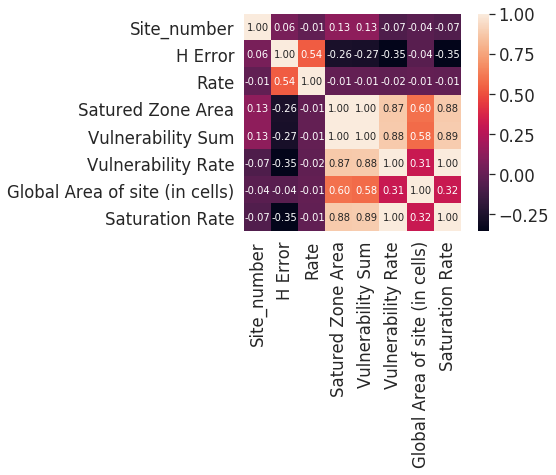

<Figure size 432x288 with 0 Axes>

In [7]:
# lib imports
import seaborn as sns
import numpy as np

cm = np.corrcoef(df_Chr_Approx.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=list(df_Chr_Approx),
                xticklabels=list(df_Chr_Approx))
plt.savefig(MYDIR + '/CorrelationMatrix_HError'+'.png')
plt.show()
plt.clf()

## Building the prediction model with the learning data

### Spliting training data and tetsing data for the dataset used for to build the prediction algorithm

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=learn_size, random_state=1)
#print("Training and testing split was successful.")

# Splitting the y (H indicator) into training and testing data
# Extracting the data corresponding to the site we want to predict
y_test = y[y.Site_number == test_site]
## We do not want to take the site number into account for the prediction
del y_test["Site_number"] 

# Removing the data for the site we want to predict
y_train = y.drop(y[y.Site_number == test_site].index)
## We do not want to take the site number into account for the prediction
del y_train["Site_number"]

# Splitting the x (features) into training and testing data
X_test = X[X.Site_number == test_site]
## We do not want to take the site number into account for the prediction
del X_test["Site_number"] 

# Removing the data for the site we want to predict
X_train = X.drop(X[X.Site_number == test_site].index)
## We do not want to take the site number into account for the prediction
del X_train["Site_number"]

### Using a random Forest algo to build the prediction model

In [9]:
#import libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# n_estimators :
# creiterion :
# random_state :
# n_jobs :
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

# Predicting results
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print(y_test_pred, X_test)

<ipython-input-9-c1b5356fed74>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


### Getting the prediction quality results

In [10]:
mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)
print('MSE train: %.3f, test: %.3f' % (mse_train, mse_test))
print('R^2 train: %.3f, test: %.3f' % (r2_train,r2_test))

MSE train: 0.000, test: 0.000
R^2 train: 0.995, test: 0.974


## Try with the test site

In [8]:
#print(df_Chr0_Approx0_Site17)
def get_testSite_datasets(df_Chr_Approx_SiteTest):
    y_testSite = df_Chr_Approx_SiteTest["H Error"]   #df_Chr0_Approx0.filter(["H Error"], axis=1)

    X_testSite = df_Chr_Approx_SiteTest.drop('H Error', axis=1)
    
    return X_testSite,y_testSite
#print(X_testSite)

In [9]:
def get_scores_testSite(forest, X_testSite, y_testSite, y_train, y_train_pred):
    y_testSite_test = forest.predict(X_testSite)
    mse_testSite_train=mean_squared_error(y_train, y_train_pred)
    mse_testSite_test=mean_squared_error(y_testSite, y_testSite_test)
    r2_testSite_train=r2_score(y_train, y_train_pred)
    r2_testSite_test=r2_score(y_testSite, y_testSite_test)
    print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_testSite, y_testSite_test)))
    print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_testSite, y_testSite_test)))
    return mse_testSite_train,mse_testSite_test,r2_testSite_train,r2_testSite_test